In [1]:
import pandas as pd
import numpy as np
import sklearn
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [102]:
imdb_df = pd.read_csv('TMDB_tv_dataset_v3.csv')

In [6]:
imdb_df.head()

,id,name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,overview,adult,backdrop_path,...,tagline,genres,created_by,languages,networks,origin_country,spoken_languages,production_companies,production_countries,episode_run_time
0,1399,Game of Thrones,8,73,en,21857,8.442,Seven noble families fight for control of the ...,False,/2OMB0ynKlyIenMJWI2Dy9IWT4c.jpg,...,Winter Is Coming,Sci-Fi & Fantasy_ Drama_ Action & Adventure,David Benioff_ D.B. Weiss,en,HBO,US,English,Revolution Sun Studios_ Television 360_ Genera...,United Kingdom_ United States of America,0
1,71446,Money Heist,3,41,es,17836,8.257,To carry out the biggest heist in history_ a m...,False,/gFZriCkpJYsApPZEF3jhxL4yLzG.jpg,...,The perfect robbery.,Crime_ Drama,Álex Pina,es,Netflix_ Antena 3,ES,Español,Vancouver Media,Spain,70
2,66732,Stranger Things,4,34,en,16161,8.624,When a young boy vanishes_ a small town uncove...,False,/2MaumbgBlW1NoPo3ZJO38A6v7OS.jpg,...,Every ending has a beginning.,Drama_ Sci-Fi & Fantasy_ Mystery,Matt Duffer_ Ross Duffer,en,Netflix,US,English,21 Laps Entertainment_ Monkey Massacre Product...,United States of America,0
3,1402,The Walking Dead,11,177,en,15432,8.121,Sheriff's deputy Rick Grimes awakens from a co...,False,/x4salpjB11umlUOltfNvSSrjSXm.jpg,...,Fight the dead. Fear the living.,Action & Adventure_ Drama_ Sci-Fi & Fantasy,Frank Darabont,en,AMC,US,English,AMC Studios_ Circle of Confusion_ Valhalla Mot...,United States of America,42
4,63174,Lucifer,6,93,en,13870,8.486,Bored and unhappy as the Lord of Hell_ Lucifer...,False,/aDBRtunw49UF4XmqfyNuD9nlYIu.jpg,...,It's good to be bad.,Crime_ Sci-Fi & Fantasy,Tom Kapinos,en,FOX_ Netflix,US,English,Warner Bros. Television_ DC Entertainment_ Jer...,United States of America,45


In [7]:
imdb_df.set_index('name',inplace=True)

In [8]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158566 entries, Game of Thrones to Anhoniyon Ka Andhera
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    158566 non-null  int64  
 1   number_of_seasons     158566 non-null  int64  
 2   number_of_episodes    158566 non-null  int64  
 3   original_language     158566 non-null  object 
 4   vote_count            158566 non-null  int64  
 5   vote_average          158566 non-null  float64
 6   overview              89357 non-null   object 
 7   adult                 158566 non-null  bool   
 8   backdrop_path         74263 non-null   object 
 9   first_air_date        128542 non-null  object 
 10  last_air_date         130608 non-null  object 
 11  homepage              49380 non-null   object 
 12  in_production         158566 non-null  bool   
 13  original_name         158561 non-null  object 
 14  popularity            158566 

In [10]:
attributes = ['id','number_of_seasons','number_of_episodes','vote_count','vote_average','adult','popularity','networks','origin_country']
imdb_df = imdb_df[attributes]

In [11]:
num_attributes = ['number_of_seasons','number_of_episodes','popularity','vote_average']

array([[<AxesSubplot:xlabel='number_of_seasons', ylabel='number_of_seasons'>,
        <AxesSubplot:xlabel='number_of_episodes', ylabel='number_of_seasons'>,
        <AxesSubplot:xlabel='popularity', ylabel='number_of_seasons'>,
        <AxesSubplot:xlabel='vote_average', ylabel='number_of_seasons'>],
       [<AxesSubplot:xlabel='number_of_seasons', ylabel='number_of_episodes'>,
        <AxesSubplot:xlabel='number_of_episodes', ylabel='number_of_episodes'>,
        <AxesSubplot:xlabel='popularity', ylabel='number_of_episodes'>,
        <AxesSubplot:xlabel='vote_average', ylabel='number_of_episodes'>],
       [<AxesSubplot:xlabel='number_of_seasons', ylabel='popularity'>,
        <AxesSubplot:xlabel='number_of_episodes', ylabel='popularity'>,
        <AxesSubplot:xlabel='popularity', ylabel='popularity'>,
        <AxesSubplot:xlabel='vote_average', ylabel='popularity'>],
       [<AxesSubplot:xlabel='number_of_seasons', ylabel='vote_average'>,
        <AxesSubplot:xlabel='number_of_episod

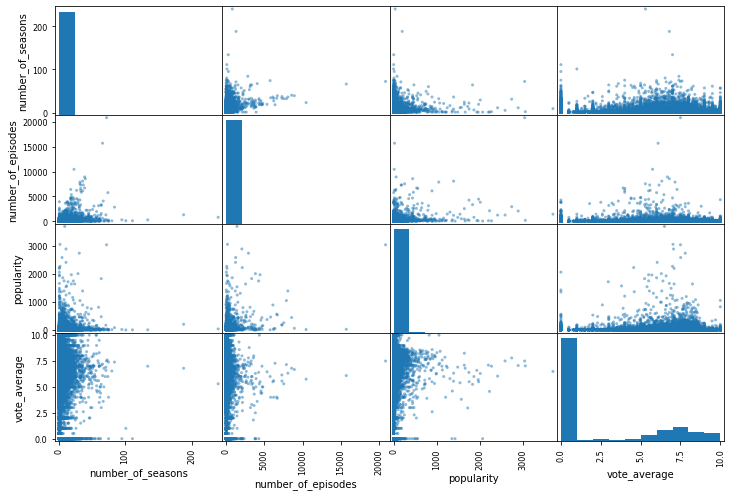

In [12]:
from pandas.plotting import scatter_matrix
scatter_matrix(imdb_df[num_attributes],figsize=(12,8))

<AxesSubplot:>

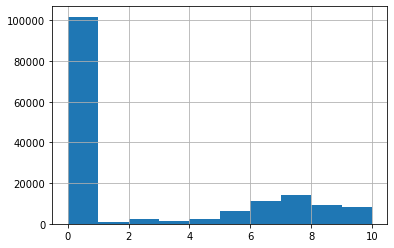

In [13]:
imdb_df['vote_average'].hist()

In [15]:
U2_vote_avg = imdb_df[imdb_df['vote_average'] < 2]

In [17]:
U2_vote_avg.describe()

,id,number_of_seasons,number_of_episodes,vote_count,vote_average,popularity
count,102864.000000,102864.000000,102864.000000,102864.000000,102864.000000,102864.000000
mean,110689.566641,1.190543,14.507554,0.017674,0.011627,1.742089
std,74579.055369,2.001383,52.004321,0.583932,0.111435,11.249700
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43475.750000,1.000000,1.000000,0.000000,0.000000,0.600000
50%,103105.500000,1.000000,4.000000,0.000000,0.000000,0.600000
75%,196292.250000,1.000000,12.000000,0.000000,0.000000,1.163250
max,236368.000000,111.000000,4279.000000,166.000000,1.900000,2071.972000


In [20]:
imdb_df['vote_count'].describe()

count    158566.000000
mean         14.144300
std         196.746395
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max       21857.000000
Name: vote_count, dtype: float64

<AxesSubplot:>

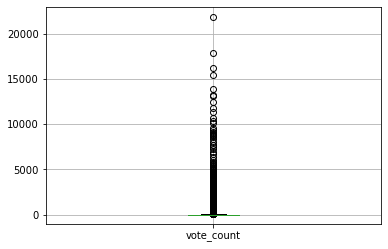

In [23]:
imdb_df.boxplot(['vote_count'])

array([[<AxesSubplot:title={'center':'vote_count'}>]], dtype=object)

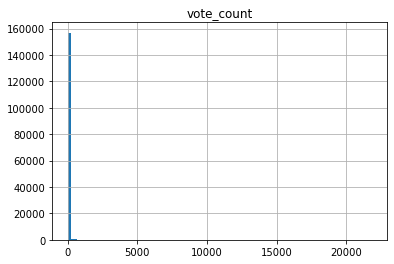

In [25]:
imdb_df.hist(['vote_count'], bins= 100)

In [85]:
vote_count_bins = pd.cut(x = imdb_df['vote_count'], bins = [-1, 0,1000, 10000, 25000]).to_frame()

In [87]:
vote_count_bins.reset_index(inplace=True)

In [88]:
vote_count_bins

,name,vote_count
0,Game of Thrones,"(10000, 25000]"
1,Money Heist,"(10000, 25000]"
2,Stranger Things,"(10000, 25000]"
3,The Walking Dead,"(10000, 25000]"
4,Lucifer,"(10000, 25000]"
...,...,...
158561,天罚-二战全纪实,"(-1, 0]"
158562,我们这一摊,"(-1, 0]"
158563,山里来了熊孩子,"(-1, 0]"
158564,开心超人联盟之勇敢之城1——棋兽传奇,"(-1, 0]"


In [89]:
vote_count_bins.groupby(['vote_count']).count()

,name
vote_count,
"(-1, 0]",101695
"(0, 1000]",56468
"(1000, 10000]",385
"(10000, 25000]",13


In [118]:
imdb_df[imdb_df['vote_count']==0]

,id,name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,overview,adult,backdrop_path,...,tagline,genres,created_by,languages,networks,origin_country,spoken_languages,production_companies,production_countries,episode_run_time
56866,233552,绝色小神医,1,1,zh,0,0.0,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,CN,NaN,NaN,China,0
56867,60684,אבודים באפריקה,2,11,he,0,0.0,NaN,False,NaN,...,NaN,NaN,Ilan Shefler_ Itay Reicher_ Yuval Sheferman,en_ he,yes,IL,English_ עִבְרִית,Kuperman Productions,Israel_ South Africa,0
56868,22928,Shark In the Park,0,0,en,0,0.0,Shark in the Park was a New Zealand television...,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NZ,NaN,NaN,NaN,60
56869,9394,Manemarak,0,0,en,0,0.0,Manemarak is an Afrikaans edutainment show abo...,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
56870,22918,Shirley Abicair In Australia,0,0,en,0,0.0,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,AU,NaN,NaN,NaN,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158561,235768,天罚-二战全纪实,1,100,zh,0,0.0,NaN,False,NaN,...,NaN,Documentary_ War & Politics,NaN,zh,NaN,CN,普通话,NaN,NaN,0
158562,235767,我们这一摊,1,13,zh,0,0.0,NaN,False,NaN,...,NaN,Reality,NaN,NaN,NaN,CN,NaN,NaN,NaN,0
158563,235766,山里来了熊孩子,1,13,zh,0,0.0,NaN,False,/qAdXlecuPyg2jb2GbRXzHEUcpmw.jpg,...,NaN,Reality,NaN,NaN,NaN,CN,NaN,NaN,NaN,0
158564,235765,开心超人联盟之勇敢之城1——棋兽传奇,1,6,zh,0,0.0,NaN,False,/ksuAmIZRkBMshJtkHtMDwyYLmDh.jpg,...,NaN,Animation_ Kids,NaN,NaN,iQiyi_ Youku_ Mango TV_ Tencent Video_ Aniworl...,CN,NaN,广东明星创意动画有限公司,NaN,0


In [119]:
imdb_df_model = imdb_df[imdb_df['vote_count']!=0]

array([[<AxesSubplot:xlabel='number_of_seasons', ylabel='number_of_seasons'>,
        <AxesSubplot:xlabel='number_of_episodes', ylabel='number_of_seasons'>,
        <AxesSubplot:xlabel='popularity', ylabel='number_of_seasons'>,
        <AxesSubplot:xlabel='vote_average', ylabel='number_of_seasons'>],
       [<AxesSubplot:xlabel='number_of_seasons', ylabel='number_of_episodes'>,
        <AxesSubplot:xlabel='number_of_episodes', ylabel='number_of_episodes'>,
        <AxesSubplot:xlabel='popularity', ylabel='number_of_episodes'>,
        <AxesSubplot:xlabel='vote_average', ylabel='number_of_episodes'>],
       [<AxesSubplot:xlabel='number_of_seasons', ylabel='popularity'>,
        <AxesSubplot:xlabel='number_of_episodes', ylabel='popularity'>,
        <AxesSubplot:xlabel='popularity', ylabel='popularity'>,
        <AxesSubplot:xlabel='vote_average', ylabel='popularity'>],
       [<AxesSubplot:xlabel='number_of_seasons', ylabel='vote_average'>,
        <AxesSubplot:xlabel='number_of_episod

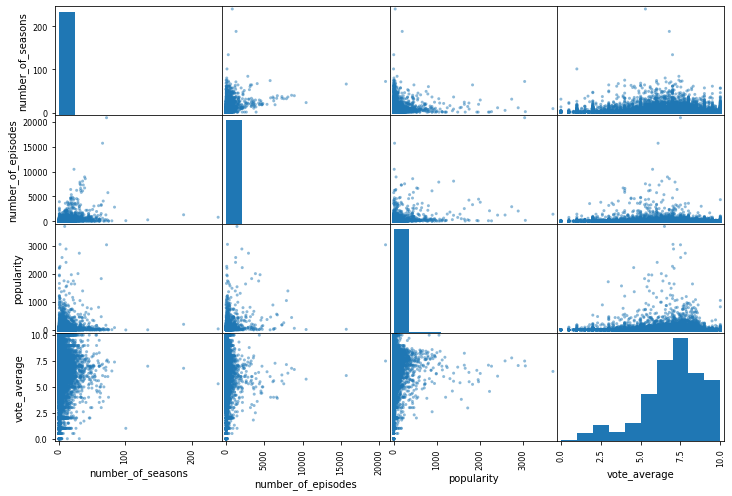

In [95]:
scatter_matrix(imdb_df_model[num_attributes],figsize=(12,8))

array([[<AxesSubplot:title={'center':'number_of_seasons'}>,
        <AxesSubplot:title={'center':'number_of_episodes'}>],
       [<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'vote_average'}>]], dtype=object)

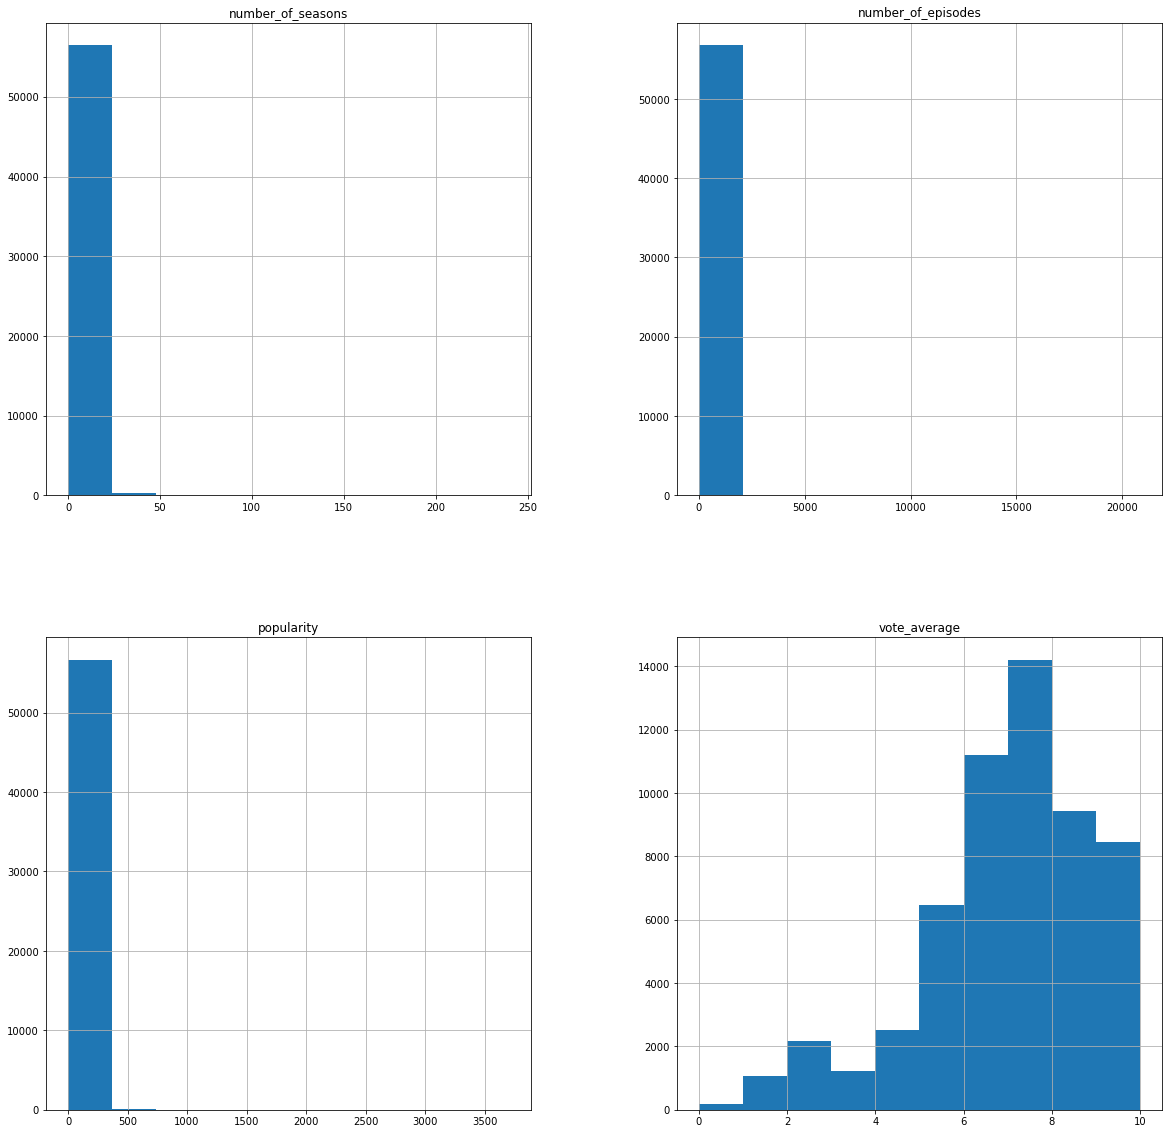

In [98]:
imdb_df_model[num_attributes].hist(figsize =(20,20))

In [120]:
imdb_df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56866 entries, 0 to 56865
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    56866 non-null  int64  
 1   name                  56866 non-null  object 
 2   number_of_seasons     56866 non-null  int64  
 3   number_of_episodes    56866 non-null  int64  
 4   original_language     56866 non-null  object 
 5   vote_count            56866 non-null  int64  
 6   vote_average          56866 non-null  float64
 7   overview              43462 non-null  object 
 8   adult                 56866 non-null  bool   
 9   backdrop_path         42788 non-null  object 
 10  first_air_date        54566 non-null  object 
 11  last_air_date         54968 non-null  object 
 12  homepage              28671 non-null  object 
 13  in_production         56866 non-null  bool   
 14  original_name         56866 non-null  object 
 15  popularity         

In [123]:
from sklearn.model_selection import train_test_split

In [131]:
train_set, test_set = train_test_split(imdb_df_model, test_size=0.2, random_state=42)
train_set, validation_set = train_test_split(train_set, test_size=0.2, random_state=42)

In [137]:
train_set.describe()

,id,number_of_seasons,number_of_episodes,vote_count,vote_average,popularity,episode_run_time
count,36393.000000,36393.000000,36393.000000,36393.000000,36393.000000,36393.000000,36393.000000
mean,88771.448493,2.270574,45.525293,41.064628,6.806052,13.588741,33.782321
std,62322.435678,4.307332,210.669184,357.691698,2.046676,66.435446,50.106964
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,42183.000000,1.000000,6.000000,1.000000,6.000000,1.202000,0.000000
50%,79981.000000,1.000000,13.000000,2.000000,7.000000,2.733000,30.000000
75%,118650.000000,2.000000,34.000000,7.000000,8.000000,7.738000,48.000000
max,236313.000000,240.000000,15704.000000,21857.000000,10.000000,3707.008000,4125.000000


In [133]:
validation_set.describe()

,id,number_of_seasons,number_of_episodes,vote_count,vote_average,popularity,episode_run_time
count,9099.000000,9099.000000,9099.000000,9099.000000,9099.000000,9099.000000,9099.000000
mean,88488.947467,2.242444,43.740191,34.369711,6.850998,13.291767,34.211122
std,62515.711276,3.933878,168.901391,239.344948,2.022192,61.169876,47.321212
min,7.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,41254.500000,1.000000,6.000000,1.000000,6.000000,1.236000,0.000000
50%,79200.000000,1.000000,13.000000,2.000000,7.000000,2.755000,30.000000
75%,119228.000000,2.000000,34.000000,7.000000,8.000000,7.614000,50.000000
max,236082.000000,101.000000,8073.000000,12398.000000,10.000000,2419.997000,2006.000000


In [134]:
test_set.describe()

,id,number_of_seasons,number_of_episodes,vote_count,vote_average,popularity,episode_run_time
count,11374.000000,11374.000000,11374.000000,11374.000000,11374.000000,11374.000000,11374.000000
mean,89735.861438,2.197995,45.299807,38.298752,6.838457,12.915949,33.782311
std,62267.379959,4.013892,279.287322,281.860900,2.043413,63.131066,39.075475
min,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,43283.000000,1.000000,6.000000,1.000000,6.000000,1.176000,0.000000
50%,81175.000000,1.000000,13.000000,2.000000,7.000000,2.679500,30.000000
75%,120098.250000,2.000000,34.000000,7.000000,8.000000,7.831000,48.000000
max,236354.000000,134.000000,20839.000000,13870.000000,10.000000,3049.228000,981.000000


In [138]:
train_set_label = train_set['vote_average']
validation_set_label = validation_set['vote_average']
test_set_label = test_set['vote_average']
train_set.drop(['vote_average'], axis=1, inplace=True)
validation_set.drop(['vote_average'], axis=1,inplace=True)
test_set.drop(['vote_average'],axis=1, inplace=True)

In [141]:
num_attributes = ['number_of_seasons','number_of_episodes','vote_count']

In [142]:
train_set = train_set[num_attributes]
validation_set = validation_set[num_attributes]
test_set = test_set[num_attributes]

In [143]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

In [205]:
train_set_tr = num_pipeline.fit_transform(train_set)
validation_set_tr = num_pipeline.fit_transform(validation_set)
test_set_tr = num_pipeline.fit_transform(test_set)

In [145]:
train_set_tr

array([[-0.29498343, -0.12116458, -0.10921462],
       [-0.29498343,  0.52440619, -0.10921462],
       [ 0.16934753,  0.09719024, -0.07007424],
       ...,
       [-0.06281795,  0.03073442, -0.10921462],
       [ 1.33017493,  0.14465868, -0.05329978],
       [ 3.18749877,  0.77124208, -0.10921462]])

In [146]:
validation_set_tr

array([[ 2.22631119,  1.30414505,  2.63914073],
       [ 0.19258283, -0.15240612,  0.37032392],
       [-0.31584926,  0.07258959, -0.13942866],
       ...,
       [-0.31584926, -0.1346433 ,  0.01934674],
       [-0.31584926, -0.18793176, -0.12271546],
       [-0.31584926, -0.164248  , -0.05168436]])

In [147]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_set_tr, train_set_label)

LinearRegression()

In [148]:
lin_reg

LinearRegression()

In [149]:
train_set_predictions = lin_reg.predict(train_set_tr)

In [150]:
train_set_predictions

array([6.79228309, 6.74454783, 6.79658065, ..., 6.78901283, 6.83481576,
       6.84571966])

In [189]:
train_df = pd.DataFrame({'prediction_lin_reg': train_set_predictions, 'label': train_set_label})

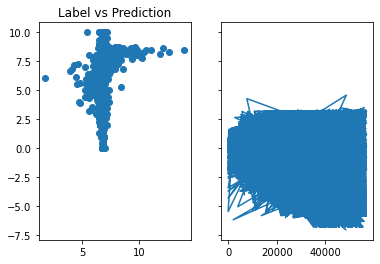

In [191]:
train_df['lin_reg_error'] = train_df['label'] - train_df['prediction_lin_reg']
# train_df.plot(y='prediction',x='label',kind='scatter')
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(y='label',x='prediction_lin_reg', data=train_df)
ax1.set_title('Label vs Prediction')
ax2.plot(train_df['lin_reg_error'])

<AxesSubplot:>

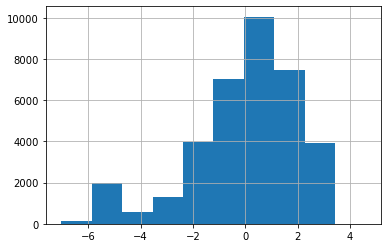

In [188]:
train_df['lin_reg_error'].hist()

In [161]:
from sklearn.metrics import mean_squared_error

In [162]:
lin_mse = mean_squared_error(train_set_label, train_set_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2.0423103543319097

In [163]:
from sklearn.metrics import mean_absolute_error

In [165]:
lin_mae = mean_absolute_error(train_set_label, train_set_predictions)
lin_mae

1.5435244981860472

In [183]:
from sklearn.tree import DecisionTreeRegressor

tree_reg_train = DecisionTreeRegressor(random_state=42)
tree_reg_train.fit(train_set_tr, train_set_label)

DecisionTreeRegressor(random_state=42)

In [186]:
tree_predictions_train = tree_reg_train.predict(train_set_tr)
tree_mse_train = mean_squared_error(train_set_label, tree_predictions_train)
tree_rmse_train = np.sqrt(tree_mse_train)
tree_rmse_train

1.85398781466102

In [192]:
train_df['prediction_regression_tree'] = tree_predictions_train

In [193]:
train_df['regression_tree_error'] = train_df['label'] - train_df['prediction_regression_tree']

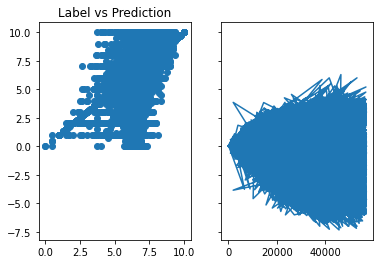

In [194]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(y='label',x='prediction_regression_tree', data=train_df)
ax1.set_title('Label vs Prediction')
ax2.plot(train_df['regression_tree_error'])

<AxesSubplot:>

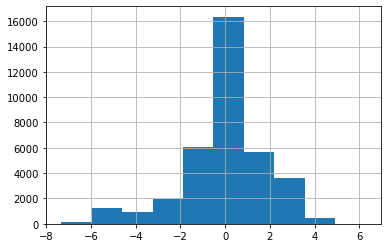

In [195]:
train_df['regression_tree_error'].hist()

In [199]:
lin_reg.score(train_set_tr, train_set_label)

0.004234130786946566

In [200]:
tree_reg_train.score(train_set_tr, train_set_label)

0.17940756518480394

In [201]:
tree_reg_val = DecisionTreeRegressor(random_state=42)
tree_reg_val.fit(validation_set_tr, validation_set_label)

DecisionTreeRegressor(random_state=42)

In [202]:
tree_predictions_val = tree_reg_val.predict(validation_set_tr)
tree_mse_val = mean_squared_error(validation_set_label, tree_predictions_val)
tree_rmse_val = np.sqrt(tree_mse_val)
tree_rmse_val

1.719969754622723

In [207]:
tree_reg_test = DecisionTreeRegressor(random_state=42)
tree_reg_test.fit(test_set_tr, test_set_label)
tree_predictions_test = tree_reg_test.predict(test_set_tr)
tree_mse_test = mean_squared_error(test_set_label, tree_predictions_test)
tree_rmse_test = np.sqrt(tree_mse_test)
tree_rmse_test

1.7776450018365493

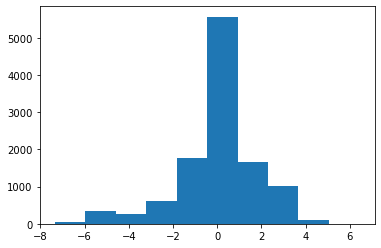

In [209]:
plt.hist(test_set_label - tree_predictions_test)
plt.show()

In [210]:
import scipy.stats as st 

In [215]:
st.t.interval(alpha=0.95, 
              df=len(test_set_label - tree_predictions_test)-1, 
              loc=np.mean(test_set_label - tree_predictions_test),  
              scale=st.sem(test_set_label - tree_predictions_test)) 

(-0.0326739642429975, 0.03267396424299736)